this code show our model detect so you need fisrt uploud the 3 models first

Download important libraries

In [ ]:
!pip install -q supervision

import supervision as sv

print(sv.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 3.2 MB/s eta 0:00:00
0.25.1


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

use model Player detector after training

In [ ]:
from ultralytics import YOLO

# Load your YOLOv8 model
PLAYER_DETECTION_MODEL = YOLO('/content/train model for player detector.pt')  # Update with the correct path to your model

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



0: 736x1280 21 players, 3 referees, 11700.2ms
Speed: 28.0ms preprocess, 11700.2ms inference, 39.9ms postprocess per image at shape (1, 3, 736, 1280)


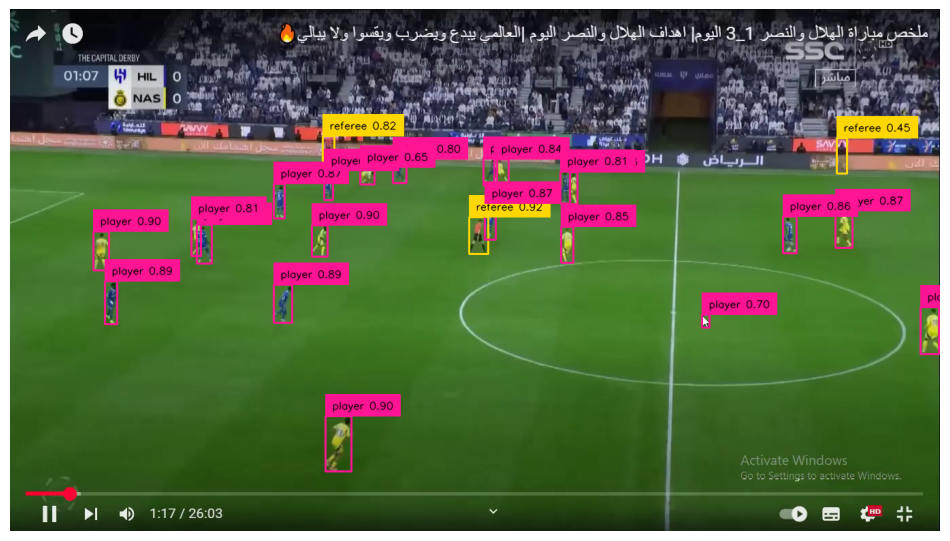

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/ScreenRecorderProject7.mp4"

box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

results = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3)
result = results[0]

# Try from_ultralytics if from_yolov8 is not available
detections = sv.Detections.from_ultralytics(result)

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections,
    labels=labels)


sv.plot_image(annotated_frame)


0: 736x1280 21 players, 3 referees, 11657.2ms
Speed: 10.0ms preprocess, 11657.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


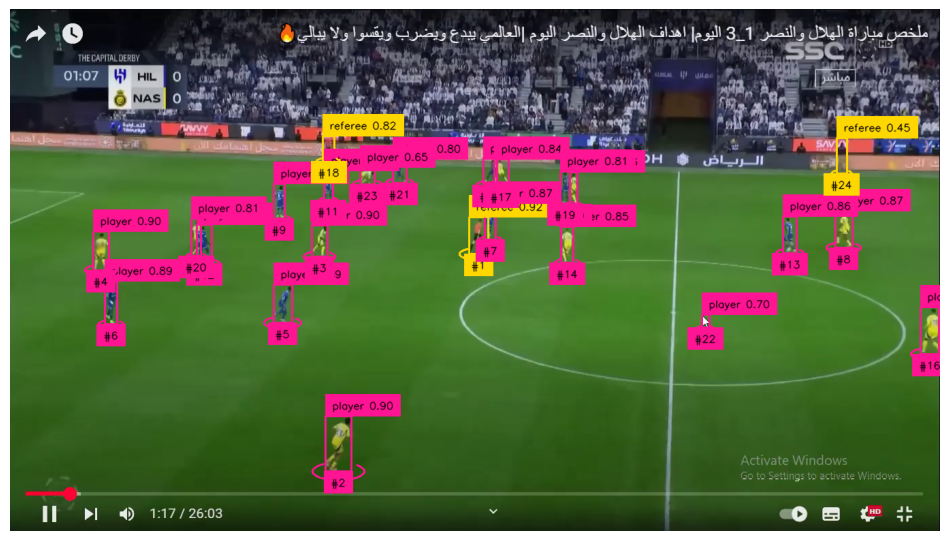

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/ScreenRecorderProject7.mp4"
BALL_ID = 0

# Define annotators
box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)
# Create a separate LabelAnnotator for tracker labels with specified text_position
tracker_label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER  # Specify text_position here
)
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

# Initialize tracker
tracker = sv.ByteTrack()
tracker.reset()

# Get frame and predictions
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)
results = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3)
result = results[0]
detections = sv.Detections.from_ultralytics(result)

# Prepare labels for box/label annotations
labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

# Filter detections for ellipse/triangle annotations and tracking
ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id -= 1
all_detections = tracker.update_with_detections(detections=all_detections)

# Prepare labels for tracked objects
tracker_labels = [
    f"#{tracker_id}"
    for tracker_id
    in all_detections.tracker_id
]

# Annotate the frame with boxes, labels, ellipses, and triangles
annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(scene=annotated_frame, detections=detections)  # Boxes
annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)  # Labels
annotated_frame = ellipse_annotator.annotate(scene=annotated_frame, detections=all_detections)  # Ellipses
# Use tracker_label_annotator for tracker labels
annotated_frame = tracker_label_annotator.annotate(scene=annotated_frame, detections=all_detections, labels=tracker_labels) # Tracker Labels
annotated_frame = triangle_annotator.annotate(scene=annotated_frame, detections=ball_detections)  # Triangles

# Display the annotated frame
sv.plot_image(annotated_frame)

use model Football Event after training

In [ ]:
from ultralytics import YOLO

EVENT_DETECTION_MODEL = YOLO('/content/footballevent.pt') # Replace with the actual path to your model


0: 256x416 1 red-card, 202.8ms
Speed: 5.2ms preprocess, 202.8ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 416)


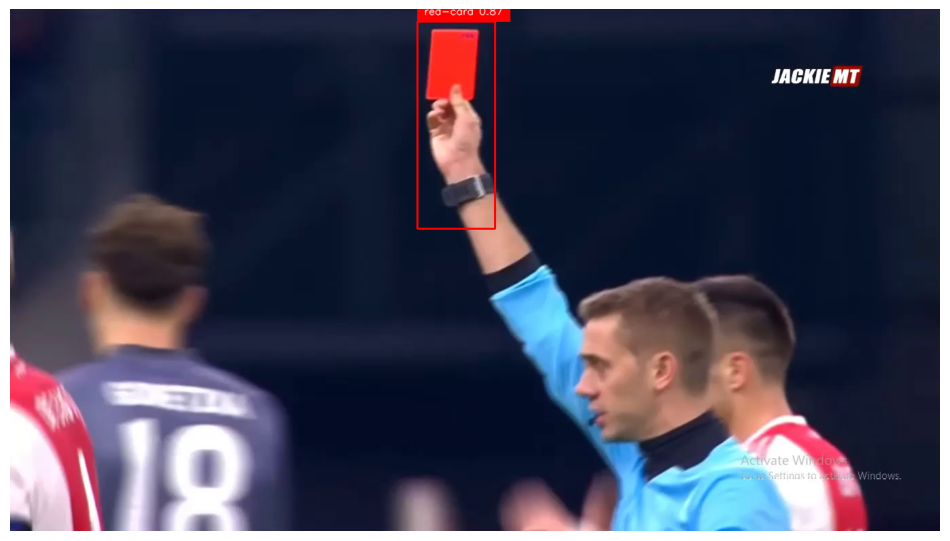

In [ ]:
import supervision as sv
from ultralytics import YOLO

# Define class names
CLASS_NAMES = ['corner-kick', 'free-kick', 'red-card', 'shooting', 'substitution', 'yellow-card']

# Load your event detection model
EVENT_DETECTION_MODEL = YOLO('/content/footballevent.pt')  # Replace with the actual path to your model

# Get a frame from your video
SOURCE_VIDEO_PATH = "/content/ScreenRecorderProject12_1.mp4"  # Replace with your video path
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

# Run inference
results = EVENT_DETECTION_MODEL.predict(frame, conf=0.5) # Adjust confidence threshold as needed
result = results[0]

# Get detections
detections = sv.Detections.from_ultralytics(result)

# Create labels using class IDs and class names mapping
labels = [
    f"{CLASS_NAMES[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

# Annotate the frame
box_annotator = sv.BoxAnnotator(color=sv.Color.from_hex('#FF0000'))  # Use from_hex for red
label_annotator = sv.LabelAnnotator(color=sv.Color.from_hex('#FF0000'))  # Use from_hex for red
annotated_frame = box_annotator.annotate(scene=frame.copy(), detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections,
    labels=labels # Pass the 'labels' list here
)

# Display the annotated frame
sv.plot_image(annotated_frame)

use model football GoalPost after training

In [ ]:
from ultralytics import YOLO

# Load your YOLOv8 model for goalpost detection
GOALPOST_DETECTION_MODEL = YOLO('/content/football goalpost.pt')  # Update with the path to your model


0: 256x416 1 goalpost, 189.3ms
Speed: 2.2ms preprocess, 189.3ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 416)


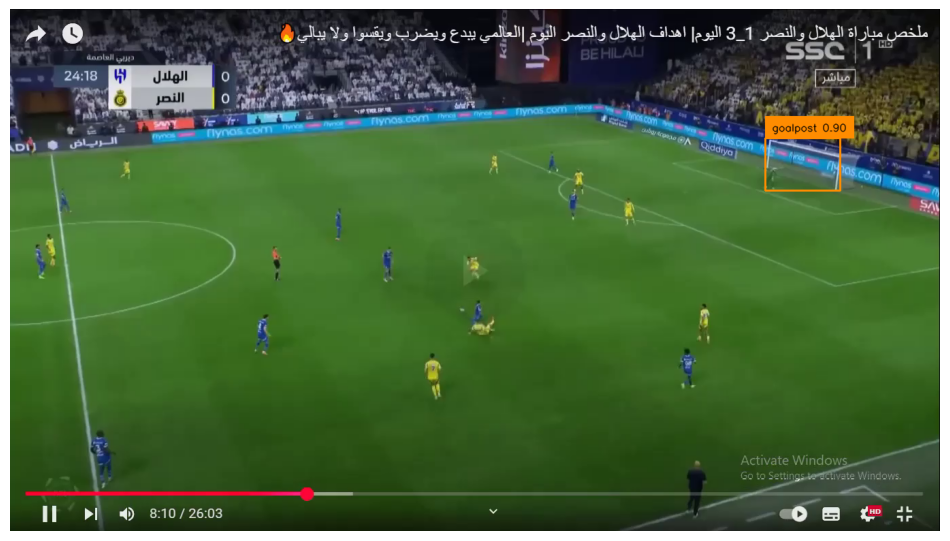

In [ ]:
import supervision as sv
from ultralytics import YOLO

SOURCE_VIDEO_PATH = "/content/ScreenRecorderProject9.mp4"

# Load your goalpost detection model
GOALPOST_DETECTION_MODEL = YOLO('/content/football goalpost.pt')  # Update with the path to your model

box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

results = GOALPOST_DETECTION_MODEL.predict(frame, conf=0.5)  # Adjust conf as needed
result = results[0]

detections = sv.Detections.from_ultralytics(result)

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(scene=annotated_frame, detections=detections)
annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)

sv.plot_image(annotated_frame)

use football player detcet and goalpost model toghater get full video with detect (it take time to finsh run )

In [ ]:
import supervision as sv
import cv2
from ultralytics import YOLO

# --- Load your models ---
PLAYER_DETECTION_MODEL = YOLO('/content/train model for player detector.pt')
GOALPOST_DETECTION_MODEL = YOLO('/content/football goalpost.pt')

# --- Define annotators ---
box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

# --- Video source and constants ---
SOURCE_VIDEO_PATH = "/content/ScreenRecorderProject7.mp4"
OUTPUT_VIDEO_PATH = "/content/output.mp4"

# --- Video processing ---
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(OUTPUT_VIDEO_PATH, fourcc, video_info.fps, (video_info.width, video_info.height))

for frame in frame_generator:
    # --- Make predictions ---
    player_results = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3)
    player_result = player_results[0] if player_results else None  # Check for empty results
    goalpost_results = GOALPOST_DETECTION_MODEL.predict(frame, conf=0.5)
    goalpost_result = goalpost_results[0] if goalpost_results else None  # Check for empty results

    # --- Create Detections ---
    player_detections = sv.Detections.from_ultralytics(player_result) if player_result else None
    goalpost_detections = sv.Detections.from_ultralytics(goalpost_result) if goalpost_result else None

    # --- Combine detections ---
    if player_detections and goalpost_detections:
        all_detections = sv.Detections.merge([player_detections, goalpost_detections])
    elif player_detections:
        all_detections = player_detections
    elif goalpost_detections:
        all_detections = goalpost_detections
    else:
        all_detections = None  # Handle case where both are None

    # --- Create labels for all detections ---
    if all_detections is not None:
        labels = [
            f"{class_name} {confidence:.2f}"
            for class_name, confidence
            in zip(all_detections['class_name'], all_detections.confidence)
        ]

        # --- Annotate frame ---
        annotated_frame = frame.copy()
        annotated_frame = box_annotator.annotate(scene=annotated_frame, detections=all_detections)
        annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=all_detections, labels=labels)
    else:
        annotated_frame = frame.copy() # If no detections, keep the frame as is

    # --- Write the annotated frame to the video file ---
    video_writer.write(annotated_frame)

# --- Release the video writer ---
video_writer.release()


0: 736x1280 21 players, 3 referees, 12340.1ms
Speed: 35.4ms preprocess, 12340.1ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)

0: 256x416 (no detections), 176.8ms
Speed: 2.9ms preprocess, 176.8ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 416)

0: 736x1280 21 players, 2 referees, 11480.7ms
Speed: 13.1ms preprocess, 11480.7ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)

0: 256x416 (no detections), 180.9ms
Speed: 3.0ms preprocess, 180.9ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 416)

0: 736x1280 20 players, 2 referees, 11626.4ms
Speed: 11.8ms preprocess, 11626.4ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)

0: 256x416 (no detections), 188.2ms
Speed: 4.3ms preprocess, 188.2ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 416)

0: 736x1280 21 players, 2 referees, 11157.9ms
Speed: 10.6ms preprocess, 11157.9ms inference, 2.0ms postprocess per image at shape (1, 3, 736, 1280)